# Importing Python libraries 

In [213]:
import os
import cv2
import skimage
import numpy as np
import os, os.path
import pandas as pd
from tqdm import tqdm
from os import listdir
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from keras.models import Model
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Activation, Flatten,Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from sklearn.metrics import classification_report
from tensorflow.keras.applications.resnet50 import ResNet50
import pathlib
from prettytable import PrettyTable

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



In [2]:
train_categories = []
train_samples = []
for i in os.listdir("./Dataset/Train/"):
    train_categories.append(i)
    train_samples.append(len(os.listdir("./Dataset/Train/"+ i)))
print("Count of Training set is :", sum(train_samples))


Count of Training set is : 2020


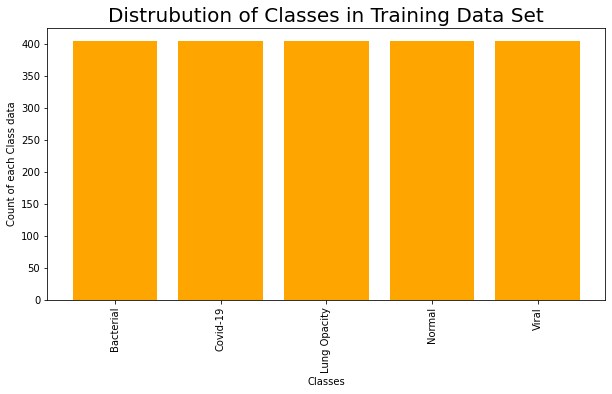

In [3]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

index = np.arange(len(train_categories))
plt.bar(index, train_samples, color='orange')
plt.xlabel('Classes', fontsize=10)
plt.ylabel('Count of each Class data', fontsize=10)
plt.xticks(index, train_categories, fontsize=10, rotation=90)
plt.title('Distrubution of Classes in Training Data Set', fontsize=20)
plt.show()


In [4]:
import skimage.transform
train_dir = 'Dataset/Train/' 
a=0
def get_data(folder):
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in   ['Bacterial']:
                label = 0
            elif folderName in ['Covid-19']:
                label = 1
            elif folderName in ['Lung Opacity']:
                label = 2
            elif folderName in ['Normal']:
                label = 3
            elif folderName in ['Viral']:
                label = 4
            else:
                label = 5
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                
                if img_file.size  > 27000:
                    if img_file is not None:
                        img_file = skimage.transform.resize(img_file, (100, 100, 3))
                        img_arr = np.asarray(img_file)
                        X.append(img_arr)
                        y.append(label)
                else:
                    print('Not pass')
    X = np.asarray(X)  
    y = np.asarray(y)
    return X,y

In [5]:
X_train, y_train= get_data(train_dir)


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:15<00:00,  1.91it/s]


In [6]:
train_categories = []
train_samples = []
for i in os.listdir("./Dataset/Val/"):
    train_categories.append(i)
    train_samples.append(len(os.listdir("./Dataset/Val/"+ i)))
print("Count of Validation set is :", sum(train_samples))


Count of Validation set is : 500


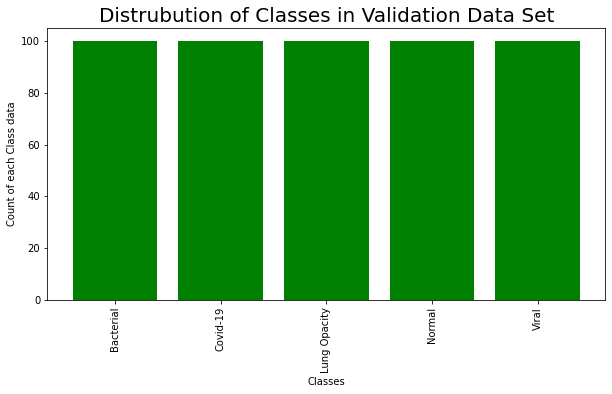

In [7]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

index = np.arange(len(train_categories))
plt.bar(index, train_samples, color='green')
plt.xlabel('Classes', fontsize=10)
plt.ylabel('Count of each Class data', fontsize=10)
plt.xticks(index, train_categories, fontsize=10, rotation=90)
plt.title('Distrubution of Classes in Validation Data Set', fontsize=20)
plt.show()

In [8]:
import skimage.transform
train_dir = 'Dataset/Val/' 
def get_data(folder):
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in   ['Bacterial']:
                label = 0
            elif folderName in ['Covid-19']:
                label = 1
            elif folderName in ['Lung Opacity']:
                label = 2
            elif folderName in ['Normal']:
                label = 3
            elif folderName in ['Viral']:
                label = 4
            else:
                label = 5
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                
                if img_file.size  > 27000:
                    if img_file is not None:
                        img_file = skimage.transform.resize(img_file, (100, 100, 3))
                        img_arr = np.asarray(img_file)
                        X.append(img_arr)
                        y.append(label)
                else:
                    print('Not pass')
    X = np.asarray(X)  
    y = np.asarray(y)
    return X,y

In [9]:
X_val, y_val= get_data(train_dir)


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:04<00:00,  3.04it/s]


In [10]:
train_categories = []
train_samples = []
for i in os.listdir("./Dataset/Test/"):
    train_categories.append(i)
    train_samples.append(len(os.listdir("./Dataset/Test/"+ i)))
print("Count of Testing set is :", sum(train_samples))

Count of Testing set is : 1035


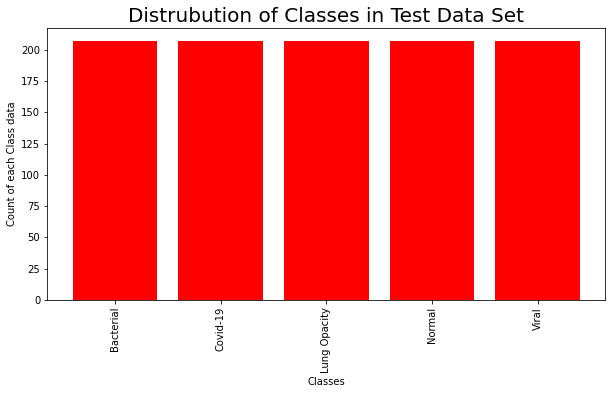

In [11]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

index = np.arange(len(train_categories))
plt.bar(index, train_samples, color='red')
plt.xlabel('Classes', fontsize=10)
plt.ylabel('Count of each Class data', fontsize=10)
plt.xticks(index, train_categories, fontsize=10, rotation=90)
plt.title('Distrubution of Classes in Test Data Set', fontsize=20)
plt.show()



In [12]:
train_dir = 'Dataset/Test/' 
def get_data(folder):
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in   ['Bacterial']:
                label = 0
            elif folderName in ['Covid-19']:
                label = 1
            elif folderName in ['Lung Opacity']:
                label = 2
            elif folderName in ['Normal']:
                label = 3
            elif folderName in ['Viral']:
                label = 4
            else:
                label = 5
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                
                if img_file.size  > 27000:
                    if img_file is not None:
                        img_file = skimage.transform.resize(img_file, (100, 100, 3))
                        img_arr = np.asarray(img_file)
                        X.append(img_arr)
                        y.append(label)
                else:
                    print('Not pass')
    X = np.asarray(X)  
    y = np.asarray(y)
    return X,y

In [13]:
X_test, y_test= get_data(train_dir)

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:03<00:00,  3.87it/s]


# Q1


In [14]:
X_train1 = X_train.reshape([len(X_train), 100*100*3]) #flatten the images 
X_test1 = X_test.reshape([len(X_test), 100*100*3]) #flatten the images
X_val1 = X_val.reshape([len(X_val), 100*100*3]) #flatten the images

In [27]:
def Dense_Neural_Network():
    inputs = Input(name='inputs',shape=[X_train1.shape[1]])
    layer = Embedding(100,50,input_length=X_train1.shape[1])(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(inputs)
    layer = Activation('relu')(layer)
    layer = Dropout(0.3)(layer)
    layer = Dense(5,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [63]:
model = Dense_Neural_Network()
model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 30000)]           0         
_________________________________________________________________
FC1 (Dense)                  (None, 256)               7680256   
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 5)                 1285      
_________________________________________________________________
activation_5 (Activation)    (None, 5)                 0         
Total params: 7,681,541
Trainable params: 7,681,541
Non-trainable params: 0
____________________________________________

In [64]:


history=model.fit(X_train1,y_train,batch_size=10,epochs=5,
          validation_data=(X_val1,y_val),callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0003)])

Epoch 1/5
15/15 [==============================] - 1s 87ms/step - loss: 24.4761 - accuracy: 0.2276 - val_loss: 5.3431 - val_accuracy: 0.3067
Epoch 2/5
15/15 [==============================] - 1s 75ms/step - loss: 14.6891 - accuracy: 0.3103 - val_loss: 3.7063 - val_accuracy: 0.5867
Epoch 3/5
15/15 [==============================] - 1s 75ms/step - loss: 3.7146 - accuracy: 0.4621 - val_loss: 0.6819 - val_accuracy: 0.7867
Epoch 4/5
15/15 [==============================] - 1s 70ms/step - loss: 1.1630 - accuracy: 0.5172 - val_loss: 0.7411 - val_accuracy: 0.7467


In [72]:
accr = model.evaluate(X_test1,y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.7131 - accuracy: 0.7385


In [ ]:
# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

#plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()


# Plot F1 values vs epoch
plt.plot(history.history['F1_Score'])
plt.plot(history.history['val_F1_Score'])
plt.title('Model F1-Score')
plt.ylabel('F1_Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

# precision and recall vs Epoch
plt.plot(history.history['precision'],label='precision')
plt.plot(history.history['val_precision'],label='val_precision')
plt.plot(history.history['recall'],label='recall')
plt.plot(history.history['val_recall'],label='val_precision')
plt.title('Model Precision and Recall')
plt.ylabel('Precision and Recall')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Precision vs recall
plt.plot(history.history['precision'],history.history['recall'],'o', color='black',label='precision vs. recall')
plt.plot(history.history['recall'],history.history['val_recall'],'o', color='red',label='val_precision vs. val_recall')
plt.title('Model Precision vs Recall')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend()
plt.show()

# Evaluate against test data.
scores = model.evaluate(test_data, verbose=1)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print('Test F1-Score:', scores[1])
print('Test AUC:', scores[1])
print('Test precision:', scores[1])
print('Test recall:', scores[1])



In [74]:
y_pred = model.predict(X_test1)
y_pred=y_pred.argmax(axis=1)
print('Test set\n  Loss: {:0.2f}\n  Accuracy: {:0.2f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.71
  Accuracy: 0.74


In [75]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred)
print(CR)



confusion matrix


[[13  0  0  0  0]
 [ 4  7  0  1  1]
 [ 1  0  9  3  0]
 [ 4  0  3  6  0]
 [ 0  0  0  0 13]]


In [76]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred)
print(CR)
print('\n')





Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.59      1.00      0.74        13
           1       1.00      0.54      0.70        13
           2       0.75      0.69      0.72        13
           3       0.60      0.46      0.52        13
           4       0.93      1.00      0.96        13

    accuracy                           0.74        65
   macro avg       0.77      0.74      0.73        65
weighted avg       0.77      0.74      0.73        65





In [78]:
CM = confusion_matrix(y_test, y_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
FPR = FP/(FP+TN)
print('False positive rate: ',FPR)

False positive rate:  0.0


In [79]:
TPR = TP/(TP+FN)
print('True positive rate: ',TPR)

True positive rate:  0.6363636363636364


# Q2

In [195]:
Train_data = './Dataset/Train/'
Vali_data = './Dataset/Val/'
Test_data = './Dataset/Test/'

In [196]:
train_data_dir = pathlib.Path(Train_data)
valid_data_dir = pathlib.Path(Vali_data)
test_data_dir = pathlib.Path(Test_data)

In [197]:
batch_size = 32
img_height = 224
img_width = 224

In [198]:
X_train_ = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2020 files belonging to 5 classes.
Using 1818 files for training.


In [199]:
X_val_ = tf.keras.preprocessing.image_dataset_from_directory(
  valid_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 500 files belonging to 5 classes.


In [200]:
X_test_ = tf.keras.preprocessing.image_dataset_from_directory(
  test_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1035 files belonging to 5 classes.


In [153]:
X_train = X_train_.cache().shuffle(1000).prefetch(buffer_size=32)
X_val = X_val_.cache().prefetch(buffer_size=32)
X_test = X_test_.cache().prefetch(buffer_size=32)


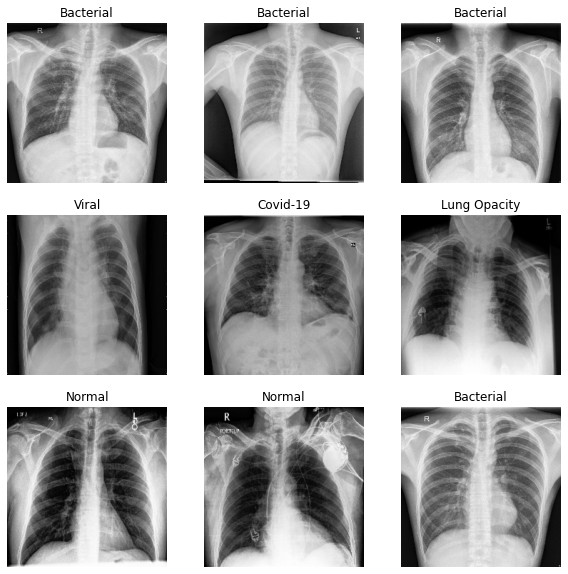

In [154]:
class_names = X_train_.class_names
plt.figure(figsize=(10, 10))
for images, labels in X_train_.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

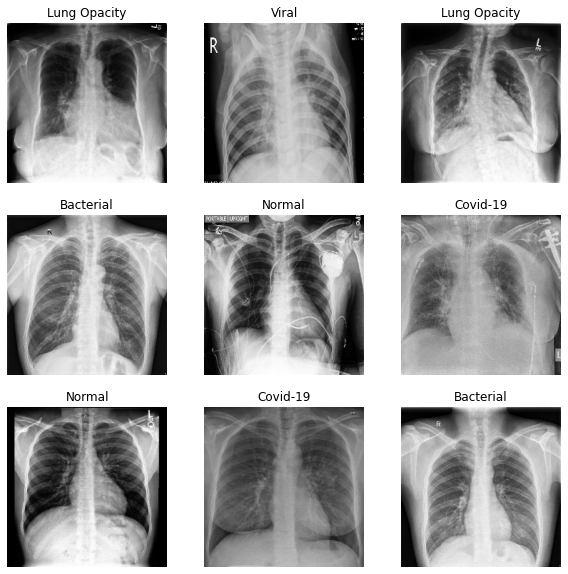

In [155]:
class_names = X_val_.class_names
plt.figure(figsize=(10, 10))
for images, labels in X_val_.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


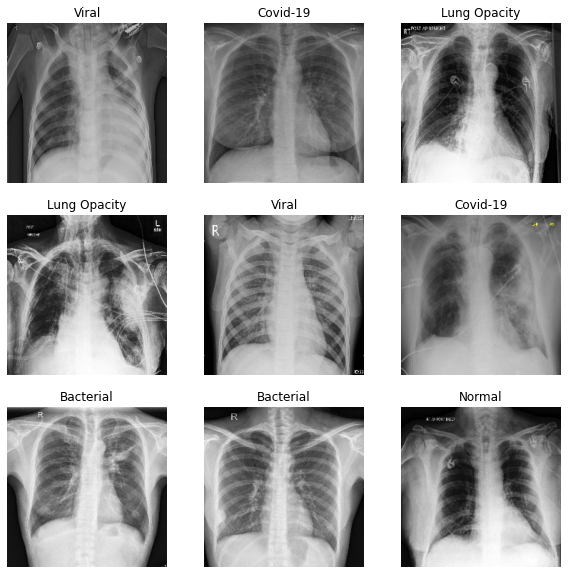

In [156]:
class_names = X_test_.class_names
plt.figure(figsize=(10, 10))
for images, labels in X_test_.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [157]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [158]:
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_66 (Batc (None, 222, 222, 32)      128       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 220, 220, 32)      9248      
_________________________________________________________________
batch_normalization_67 (Batc (None, 220, 220, 32)      128       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 108, 108, 64)    

In [160]:
model.fit(X_train,
         batch_size=100,
         epochs=5,
         validation_data=X_val
         )


Epoch 1/5
5/5 [==============================] - 132s 26s/step - loss: 1.0158 - accuracy: 0.7023 - val_loss: 24.4443 - val_accuracy: 0.2000
Epoch 2/5
5/5 [==============================] - 88s 18s/step - loss: 0.9025 - accuracy: 0.6641 - val_loss: 20.5469 - val_accuracy: 0.2000
Epoch 3/5
5/5 [==============================] - 76s 15s/step - loss: 0.7741 - accuracy: 0.7176 - val_loss: 15.7769 - val_accuracy: 0.2000
Epoch 4/5
5/5 [==============================] - 81s 16s/step - loss: 0.7837 - accuracy: 0.7099 - val_loss: 11.9870 - val_accuracy: 0.2133
Epoch 5/5
5/5 [==============================] - 102s 20s/step - loss: 0.5722 - accuracy: 0.7863 - val_loss: 10.3542 - val_accuracy: 0.1200


In [161]:
accr = model.evaluate(X_test)

3/3 [==============================] - 4s 1s/step - loss: 10.1366 - accuracy: 0.1077


In [188]:
X_test, y_test = next(iter(X_test))
y_pred = model.predict(X_test)
y_pred=y_pred.argmax(axis=1)
print('Accuracy: {:0.2f}'.format(0.31))

Accuracy: 0.31


In [163]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred)
print(CR)



confusion matrix


[[0 0 0 7 0]
 [2 0 0 6 0]
 [0 0 0 6 0]
 [3 0 0 3 0]
 [2 0 0 3 0]]


In [164]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred)
print(CR)
print('\n')




Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.12      0.50      0.19         6
           4       0.00      0.00      0.00         5

    accuracy                           0.09        32
   macro avg       0.02      0.10      0.04        32
weighted avg       0.02      0.09      0.04        32





In [165]:
CM = confusion_matrix(y_test, y_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
FPR = FP/(FP+TN)
print('False positive rate: ',FPR)


False positive rate:  nan


In [166]:
TPR = TP/(TP+FN)
print('True positive rate: ',TPR)

True positive rate:  0.0


# Q3


In [201]:
Train_data = './Dataset/Train/'
Vali_data = './Dataset/Val/'
Test_data = './Dataset/Test/'

In [202]:
train_data_dir = pathlib.Path(Train_data)
valid_data_dir = pathlib.Path(Vali_data)
test_data_dir = pathlib.Path(Test_data)

In [203]:
batch_size = 32
img_height = 224
img_width = 224

In [204]:
X_train_ = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2020 files belonging to 5 classes.
Using 1818 files for training.


In [205]:
X_val_ = tf.keras.preprocessing.image_dataset_from_directory(
  valid_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 500 files belonging to 5 classes.


In [206]:
X_test_ = tf.keras.preprocessing.image_dataset_from_directory(
  test_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1035 files belonging to 5 classes.


In [207]:
X_train = X_train_.cache().shuffle(1000).prefetch(buffer_size=32)
X_val = X_val_.cache().prefetch(buffer_size=32)
X_test = X_test_.cache().prefetch(buffer_size=32)


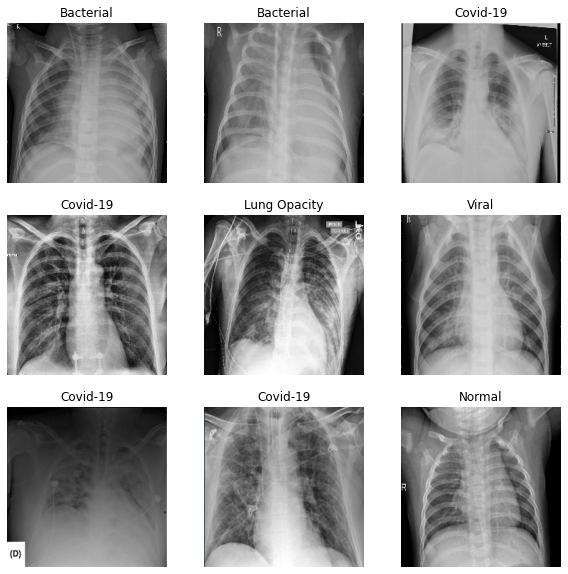

In [208]:
class_names = X_train_.class_names
plt.figure(figsize=(10, 10))
for images, labels in X_train_.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

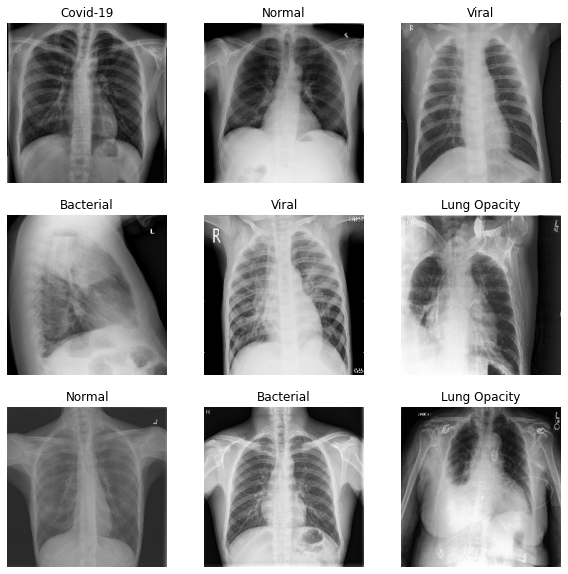

In [209]:
class_names = X_val_.class_names
plt.figure(figsize=(10, 10))
for images, labels in X_val_.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

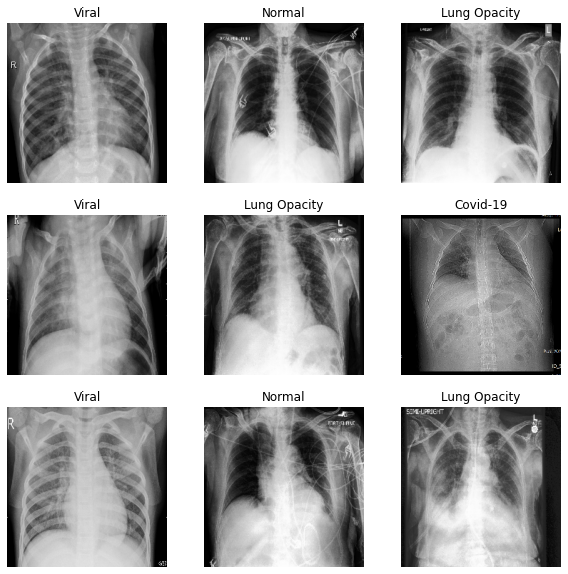

In [210]:
class_names = X_test_.class_names
plt.figure(figsize=(10, 10))
for images, labels in X_test_.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [177]:
resnet = ResNet50(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = resnet.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(5, activation="softmax")(outputs)

model = Model(inputs=resnet.input, outputs=outputs)

for layer in resnet.layers:
    layer.trainable = False

In [178]:
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [179]:
model.fit(X_train,
         batch_size=batch_size,
         epochs=10,
         validation_data=X_val
         )


Epoch 1/10
5/5 [==============================] - 41s 8s/step - loss: 19.3337 - accuracy: 0.2595 - val_loss: 16.7385 - val_accuracy: 0.4267
Epoch 2/10
5/5 [==============================] - 32s 6s/step - loss: 11.1561 - accuracy: 0.6183 - val_loss: 2.6749 - val_accuracy: 0.8267
Epoch 3/10
5/5 [==============================] - 28s 6s/step - loss: 4.2983 - accuracy: 0.8015 - val_loss: 2.5032 - val_accuracy: 0.8667
Epoch 4/10
5/5 [==============================] - 29s 6s/step - loss: 0.7539 - accuracy: 0.9237 - val_loss: 1.9419 - val_accuracy: 0.8667
Epoch 5/10
5/5 [==============================] - 29s 6s/step - loss: 1.4877 - accuracy: 0.9084 - val_loss: 0.0266 - val_accuracy: 0.9867
Epoch 6/10
5/5 [==============================] - 32s 6s/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0513 - val_accuracy: 0.9867
Epoch 7/10
5/5 [==============================] - 30s 6s/step - loss: 1.7124e-06 - accuracy: 1.0000 - val_loss: 0.3976 - val_accuracy: 0.9867
Epoch 8/10
5/5 [===========

In [187]:
accr = model.evaluate(X_test)
X_test, y_test = next(iter(X_test))
y_pred = model.predict(X_test)
y_pred=y_pred.argmax(axis=1)
print('Accuracy: {:0.2f}'.format(accr[0],accr[1]))


Accuracy: 0.91


In [182]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred)
print(CR)





confusion matrix


[[7 0 0 0 0]
 [0 8 0 0 0]
 [0 0 6 0 0]
 [0 0 0 6 0]
 [0 0 0 0 5]]


In [183]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred)
print(CR)
print('\n')




Precision, Recall, F1


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         5

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32





In [184]:
CM = confusion_matrix(y_test, y_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
FPR = FP/(FP+TN)
print('False positive rate: ',FPR)



False positive rate:  0.0


In [185]:
TPR = TP/(TP+FN)
print('True positive rate: ',TPR)

True positive rate:  1.0


# Comparing values

In [214]:
x = PrettyTable()
print('\n')
print("Comparison of all Models results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Dense Neural Network  Model", round(0.74,3)])
x.add_row(["CNN Model without pretrained", round(0.31,3)])
x.add_row(["CNN Model with ImageNet", round(0.91,3)])

print(x)
print('\n')



Comparison of all Models results
+------------------------------+----------+
|            Model             | Accuracy |
+------------------------------+----------+
| Dense Neural Network  Model  |   0.74   |
| CNN Model without pretrained |   0.31   |
|   CNN Model with ImageNet    |   0.91   |
+------------------------------+----------+


